In [67]:
import pandas as pd
import numpy as np

In [69]:
from os import listdir
from os.path import isfile, join

In [71]:
onlyfiles = ['../' + f for f in listdir('../') if isfile(join('../', f))]
onlyfiles

['../cleveland.data',
 '../hungarian.data',
 '../long-beach-va.data',
 '../new.data',
 '../README.md',
 '../switzerland.data']

In [73]:
def treatement(file, limit=-1):
    file = open(file, encoding='iso-8859-1')
    data = file.read()
    file.close()
    data = data.replace('\n', ' ')
    if limit != -1:
        data = np.array(data.split(' name '))[:-limit]
    else:
        data = np.array(data.split(' name '))
    data = list(filter(lambda x: len(x) > 0, list(map(lambda x: np.array(x.split(' ')).flatten(), data))))[:-1]
    data = np.float32(np.array(data))
    condlist = [2, 3, 8, 9, 11, 13, 14, 15, 18, 31, 32, 33, 34, 37, 39, 40, 43, 50, 57]
    data_selected = []
    for i in range(len(data)):
        data_selected.append([data[i][x] for x in range(len(data[i])) if x in condlist])
    data_selected = np.array(data_selected)
    return data_selected

In [75]:
data = []
for file in onlyfiles:
    if 'cleveland' in file:
        data = data + list(treatement(file, 11))
    else:
        data = data + list(treatement(file))

In [77]:
data = np.array(data)
data.shape


(1202, 19)

In [79]:
df = pd.DataFrame(data, columns=['age', 'sex', 'chest_pain', 'presure_blood_resting', 
                                          'colesterol','cigarettes_per_day', 'smoker_years',
                                           'sugar', 'electrocardio',
                                          'max_heart_rate',  'res_heart_rate',
                                          'blood_presure_sistoles', 'blood_presure_diastoles', 
                                          'angina', 'rest_after_exercicie_presure',
                                          'slope_of_rest_after_exercice', 'major_vessels', 'thal',
                                          'prob'])

In [81]:
df[df == -9.0] = np.nan
df[df['presure_blood_resting'] == 0] = np.nan
df[df['colesterol'] == 0] = np.nan

In [82]:
for name in df.columns:
    print('\033[1m'+name+'\033[0;0m')
    print(df[name].unique())

age
[63. 67. 37. 41. 56. 62. 57. 53. 44. 52. 48. 54. 49. 64. 58. 60. 50. 66.
 43. 40. 69. 59. 42. 55. 61. 65. 71. 51. 46. 45. 39. 68. 47. 34. 35. 29.
 70. 77. 38. 74. 76. 36. 32. 31. 33. 28. 30. nan 72. 75.]
sex
[ 1.  0. nan]
chest_pain
[ 1.  4.  3.  2. nan]
presure_blood_resting
[145. 160. 120. 130. 140. 172. 150. 110. 132. 117. 135. 112. 105. 124.
 125. 142. 128. 170. 155. 104. 180. 138. 108. 134. 122. 115. 118. 100.
 200.  94. 165. 102. 152. 101. 126. 174. 148. 178. 158. 192. 129. 144.
 123. 136. 146. 106. 156. 154. 113. 190.  92.  98.  nan  96. 116. 114.
 127. 164.]
colesterol
[233. 286. 229. 250. 204. 236. 268. 354. 254. 203. 192. 294. 256. 263.
 199. 168. 239. 275. 266. 211. 283. 284. 224. 206. 219. 340. 226. 247.
 167. 230. 335. 234. 177. 276. 353. 243. 225. 302. 212. 330. 175. 417.
 197. 198. 290. 253. 172. 273. 213. 305. 216. 304. 188. 282. 185. 232.
 326. 231. 269. 267. 248. 360. 258. 308. 245. 270. 208. 264. 321. 274.
 325. 235. 257. 164. 141. 252. 255. 201. 222. 260. 182. 3

In [83]:
df.isna().sum().sum()/(df.shape[0]*df.shape[1])*100

23.522199842367982

In [84]:
df.isna().sum().sum()

5372

In [85]:
df.columns

Index(['age', 'sex', 'chest_pain', 'presure_blood_resting', 'colesterol',
       'cigarettes_per_day', 'smoker_years', 'sugar', 'electrocardio',
       'max_heart_rate', 'res_heart_rate', 'blood_presure_sistoles',
       'blood_presure_diastoles', 'angina', 'rest_after_exercicie_presure',
       'slope_of_rest_after_exercice', 'major_vessels', 'thal', 'prob'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023E2A386BB0>,
      dtype=object)

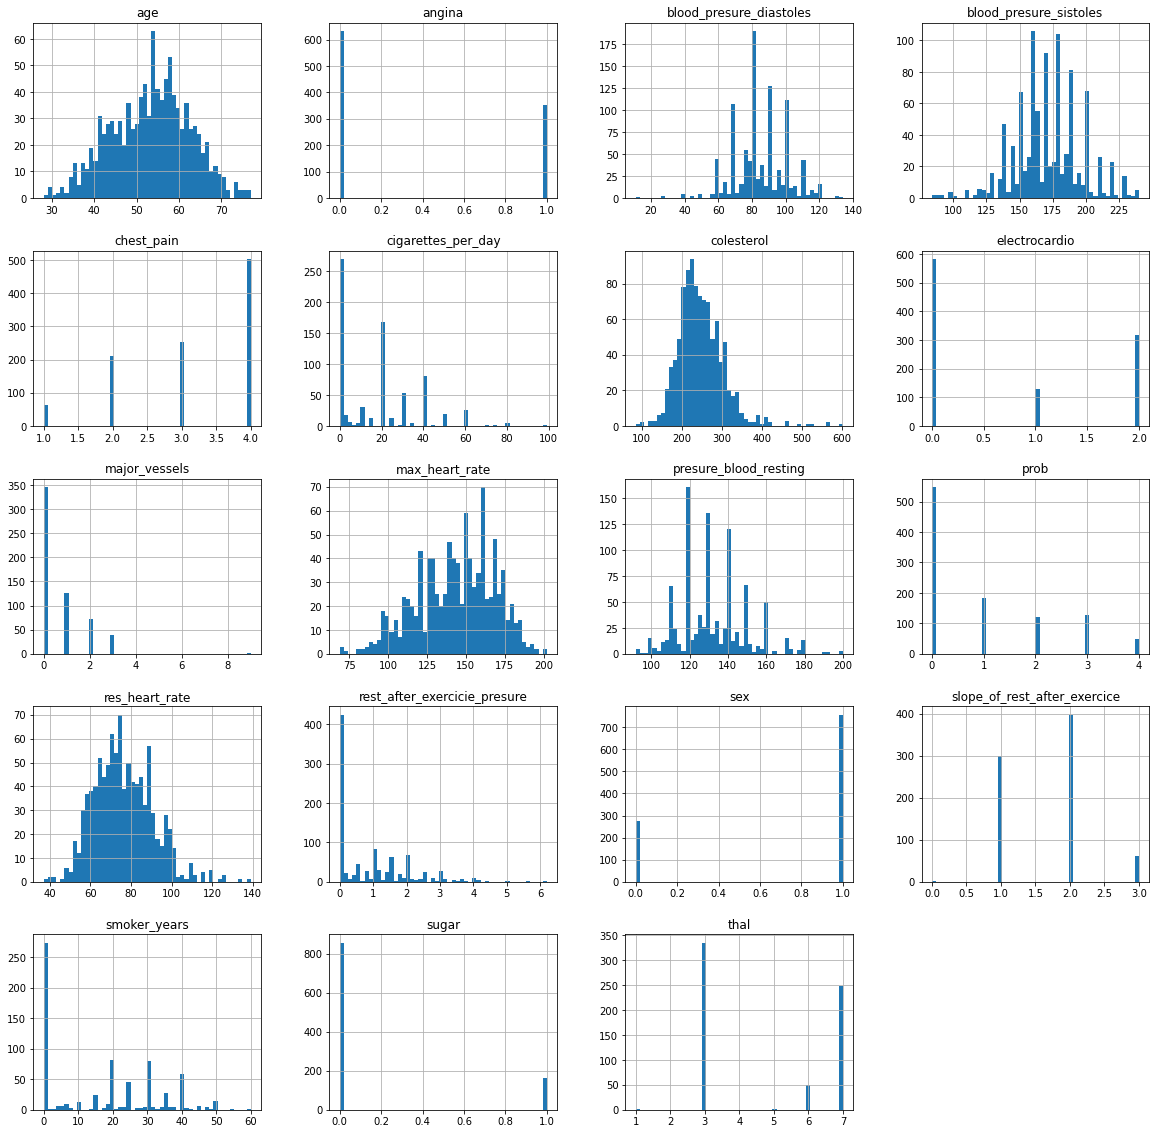

In [86]:
df.hist(bins=50, figsize=(20,20))